   TOAL ACTIVE POWER [MW]            WeatherType  Present
0                0.032324  Weather_Broken clouds        0
1                0.032324  Weather_Broken clouds        0
2                0.032324  Weather_Broken clouds        0
3                0.032324  Weather_Broken clouds        0
4                0.032324  Weather_Broken clouds        0


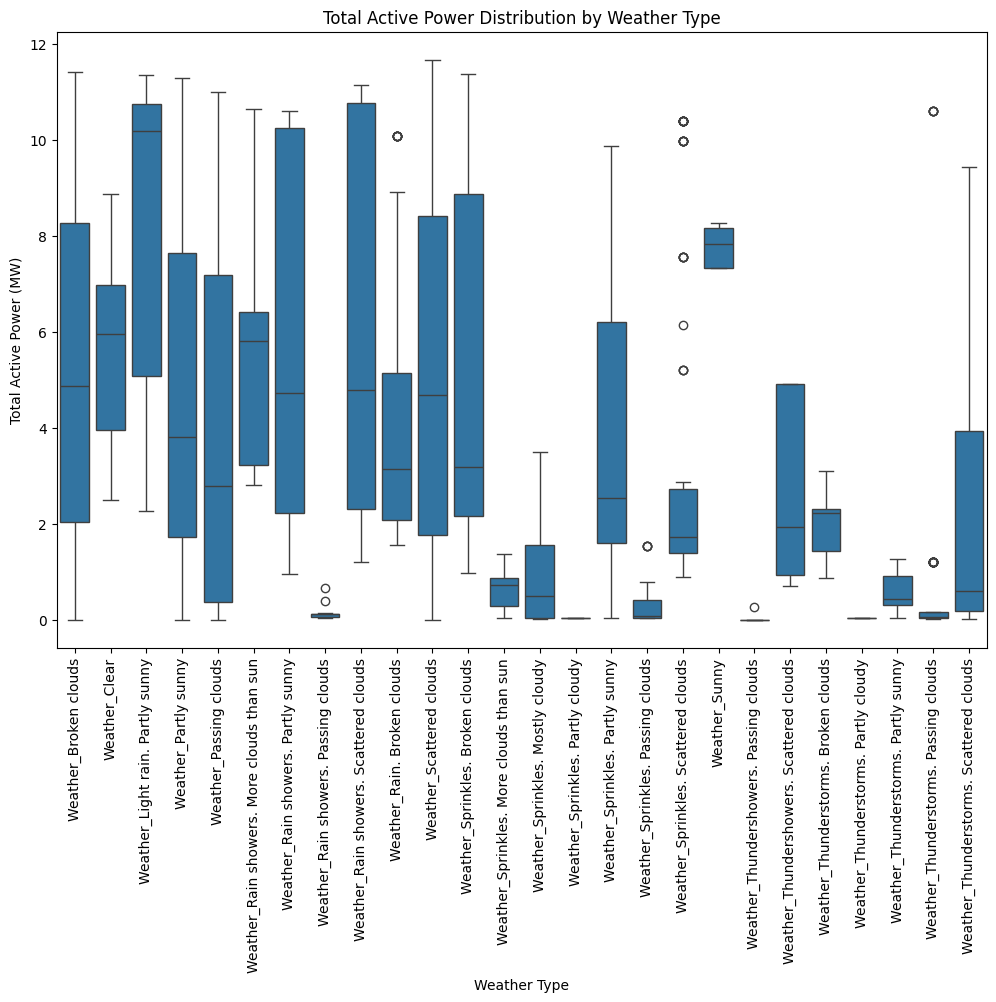

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/octomber by min.xlsx'
data = pd.read_excel(file_path)

# Strip any leading or trailing spaces in column names
data.columns = data.columns.str.strip()

# Now, use the stripped column names
weather_columns = [col for col in data.columns if col.startswith('Weather_')]

# Melt the DataFrame to long format for weather types
melted_data = pd.melt(data, id_vars=['TOAL ACTIVE POWER [MW]'], value_vars=weather_columns,
                      var_name='WeatherType', value_name='Present')

print(melted_data.head())


# Filter out rows where the weather type is not present (Present == 0)
melted_data = melted_data[melted_data['Present'] == 1]

# Boxplot for Total Active Power by Weather Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='WeatherType', y='TOAL ACTIVE POWER [MW]', data=melted_data)
plt.title('Total Active Power Distribution by Weather Type')
plt.xlabel('Weather Type')
plt.ylabel('Total Active Power (MW)')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()


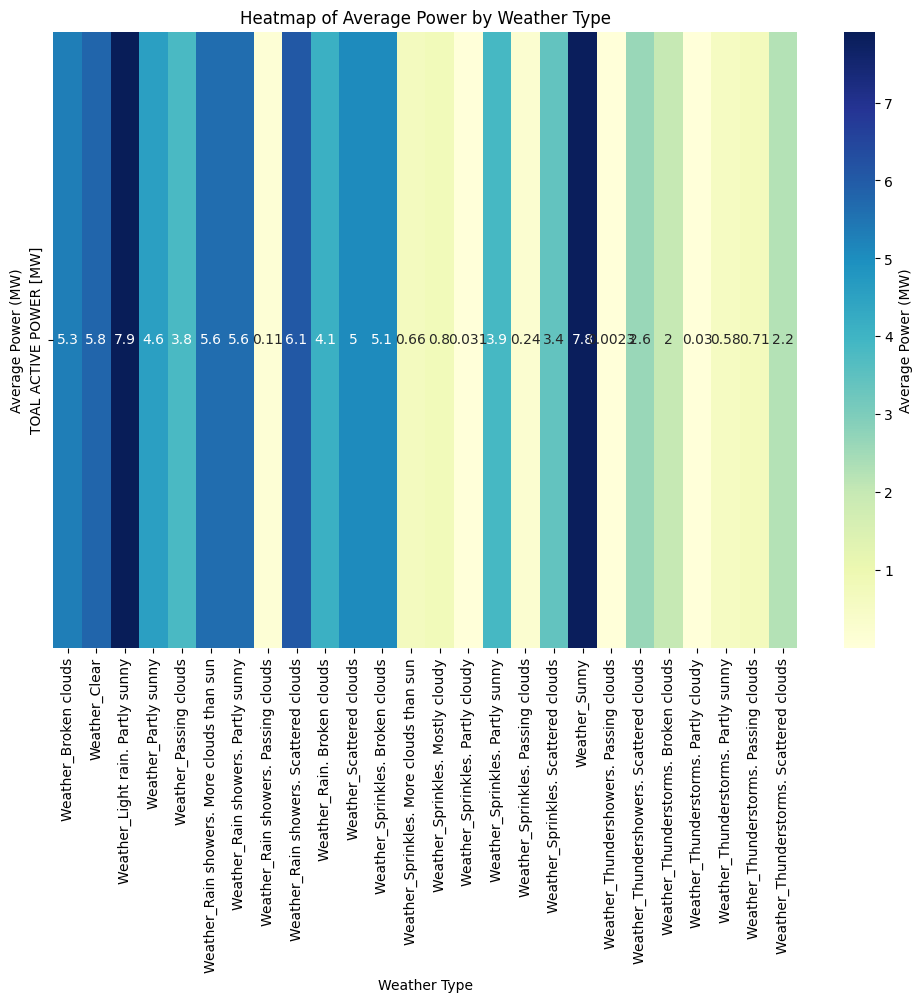

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/octomber by min.xlsx'
data = pd.read_excel(file_path)

# Strip any leading or trailing spaces in column names
data.columns = data.columns.str.strip()

# Melt the DataFrame to long format for weather types
weather_columns = [col for col in data.columns if col.startswith('Weather_')]
melted_data = pd.melt(data, id_vars=['TOAL ACTIVE POWER [MW]'], value_vars=weather_columns,
                      var_name='WeatherType', value_name='Present')

# Filter the melted data to keep only the rows where weather type is present
filtered_data = melted_data[melted_data['Present'] == 1]

# Group by Weather Type and calculate the average power
average_power_by_weather = filtered_data.groupby('WeatherType')['TOAL ACTIVE POWER [MW]'].mean().reset_index()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(average_power_by_weather.set_index('WeatherType').T, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Average Power (MW)'})
plt.title('Heatmap of Average Power by Weather Type')
plt.ylabel('Average Power (MW)')
plt.xlabel('Weather Type')
plt.show()


In [4]:
import pandas as pd
import plotly.express as px

# Load your dataset
file_path = '/content/octomber by min.xlsx'
data = pd.read_excel(file_path)

# Clean the column names by stripping any leading or trailing whitespace
data.columns = data.columns.str.strip()

# Ensure the column name is correct
power_column = 'TOAL ACTIVE POWER [MW]'  # Adjusted for correct column name

# Select the weather columns and calculate the mean power output for each type
weather_columns = [col for col in data.columns if col.startswith('Weather_')]
data['Total Power'] = data[power_column]

# Melt the DataFrame to long format for weather types
melted_data = pd.melt(data, id_vars=['Total Power'], value_vars=weather_columns,
                      var_name='WeatherType', value_name='Presence')

# Filter the rows where the weather type is present
melted_data = melted_data[melted_data['Presence'] == 1]

# Group by weather type and calculate the average power
average_power_by_weather = melted_data.groupby('WeatherType').mean().reset_index()

# Create a Treemap
fig = px.treemap(average_power_by_weather,
                 path=['WeatherType'],
                 values='Total Power',
                 title='Treemap of Average Power Output by Weather Type',
                 color='Total Power',
                 color_continuous_scale='Viridis')

# Display the plot
fig.show()


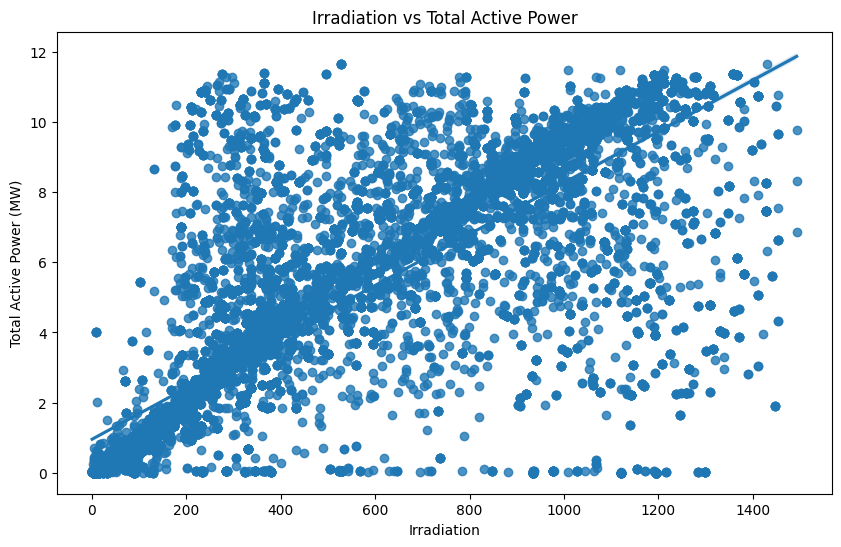

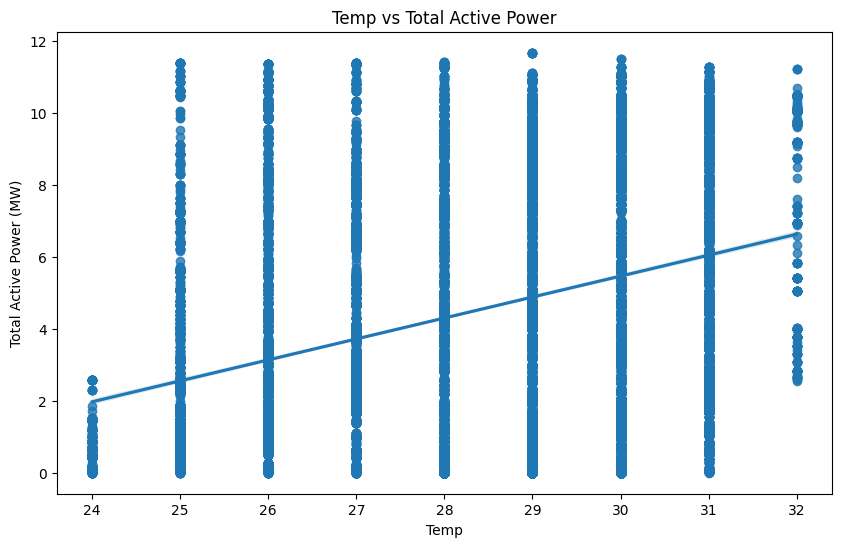

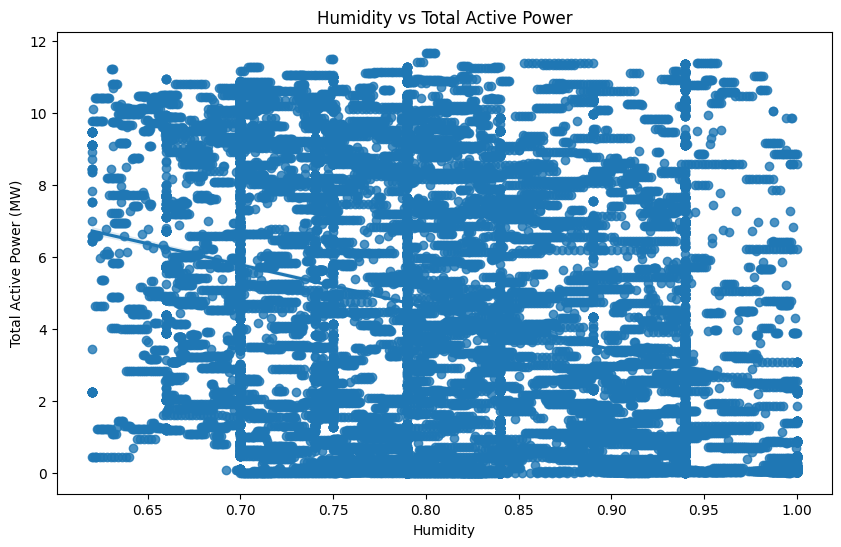

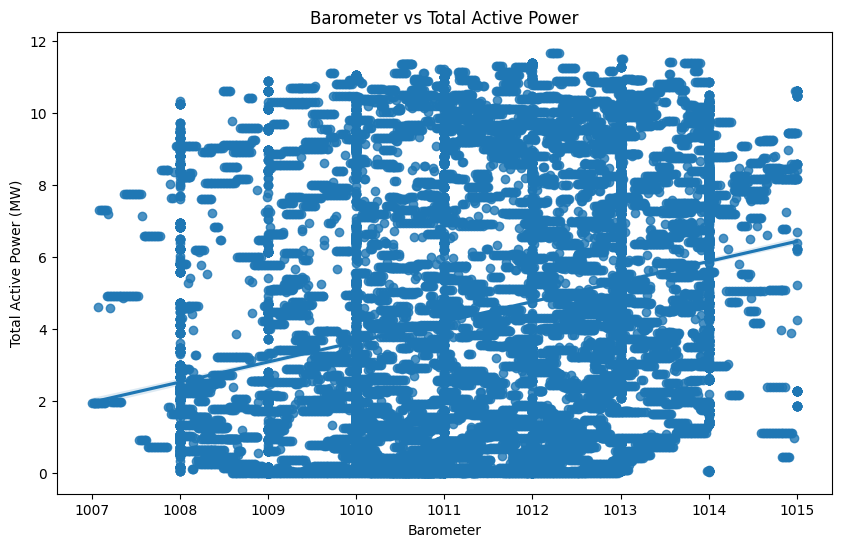

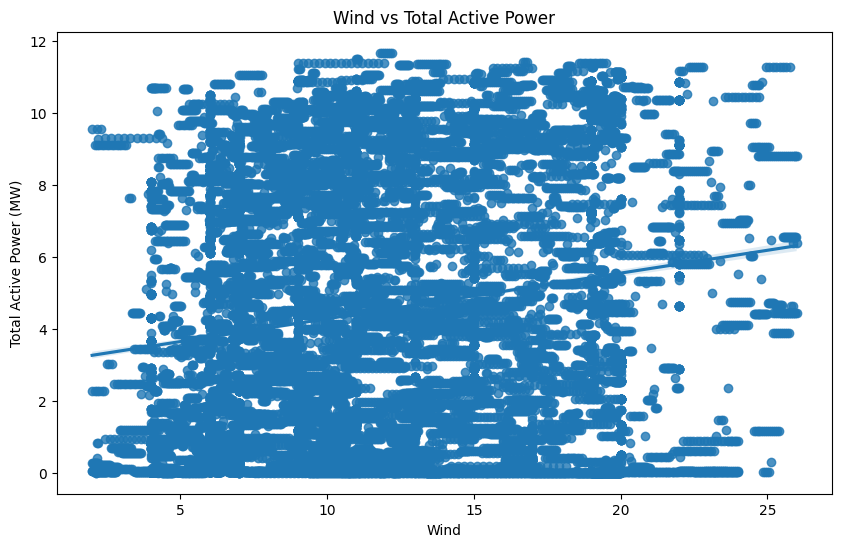

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/octomber by min.xlsx'
data = pd.read_excel(file_path)

# Clean the column names by stripping any leading or trailing whitespace
data.columns = data.columns.str.strip()

# Specify the columns of interest
columns_needed = ['TOAL ACTIVE POWER [MW]', 'Irradiation', 'Temp', 'Humidity', 'Barometer', 'Wind']

# Scatter plot and regression line for each pair of variables
for col in columns_needed[1:]:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=data[col], y=data['TOAL ACTIVE POWER [MW]'])
    plt.title(f'{col} vs Total Active Power')
    plt.xlabel(col)
    plt.ylabel('Total Active Power (MW)')
    plt.show()


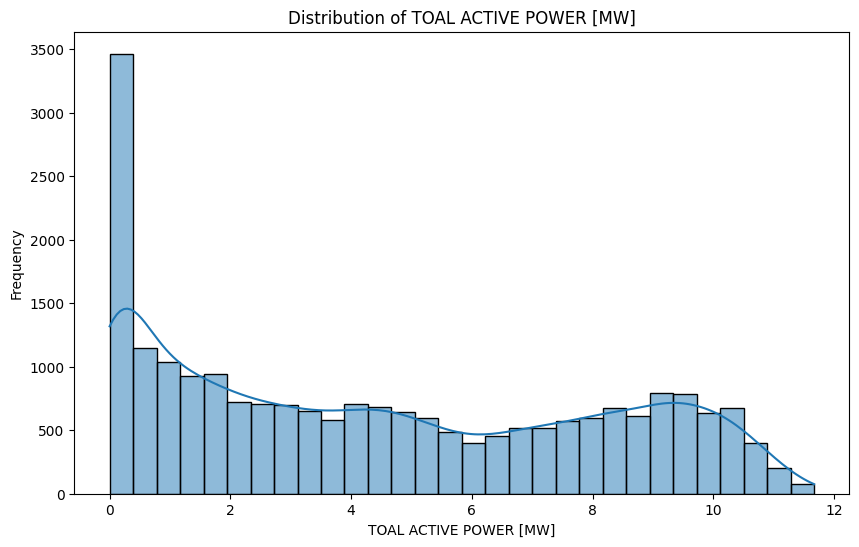

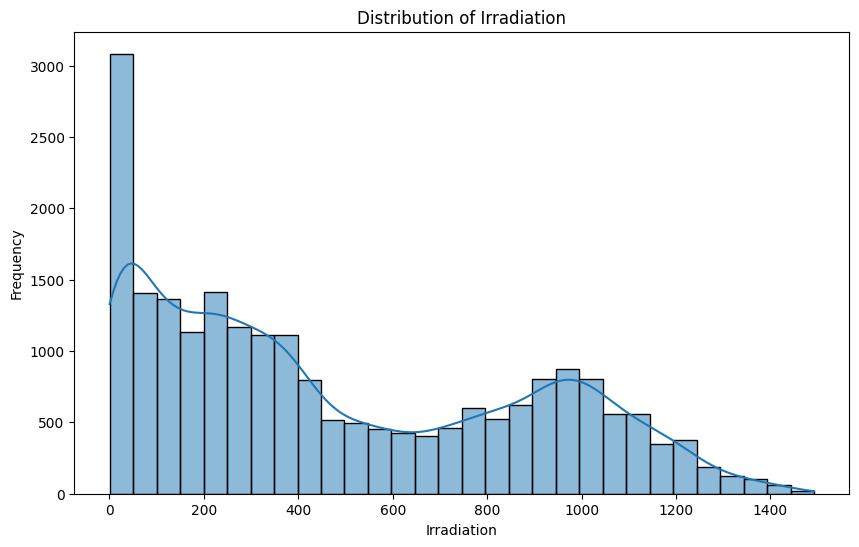

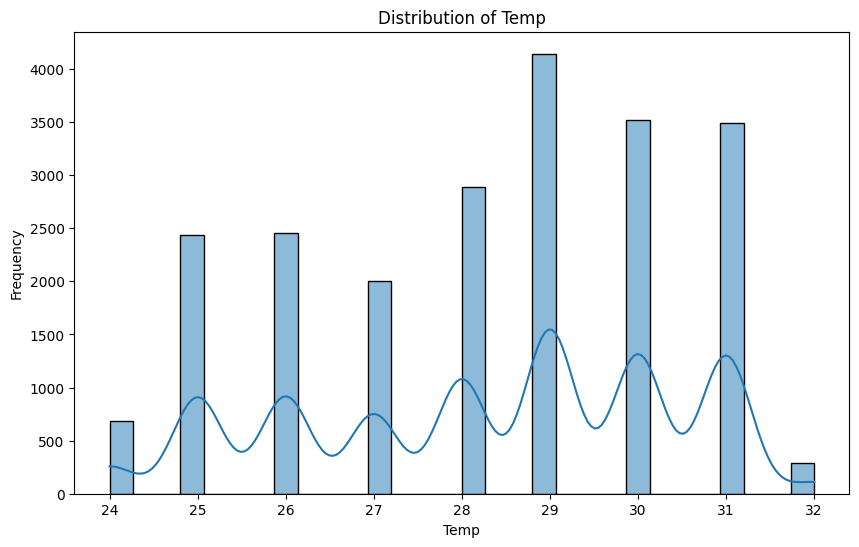

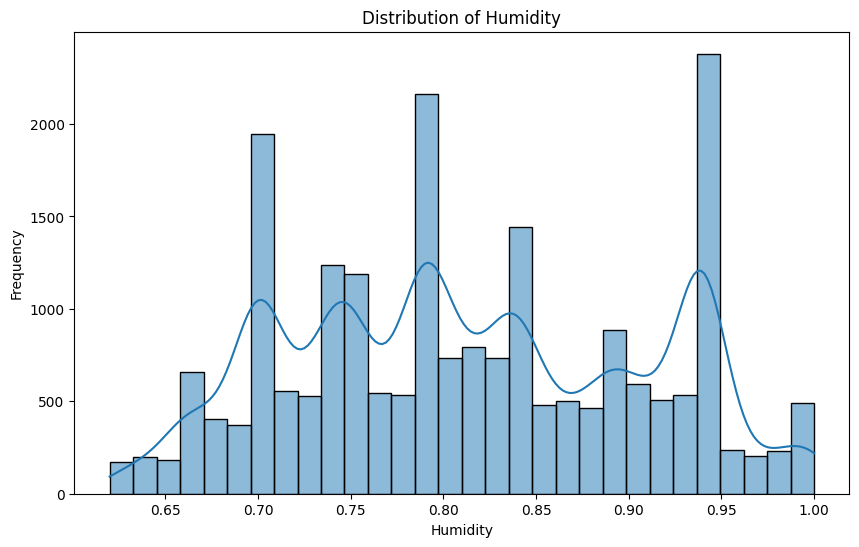

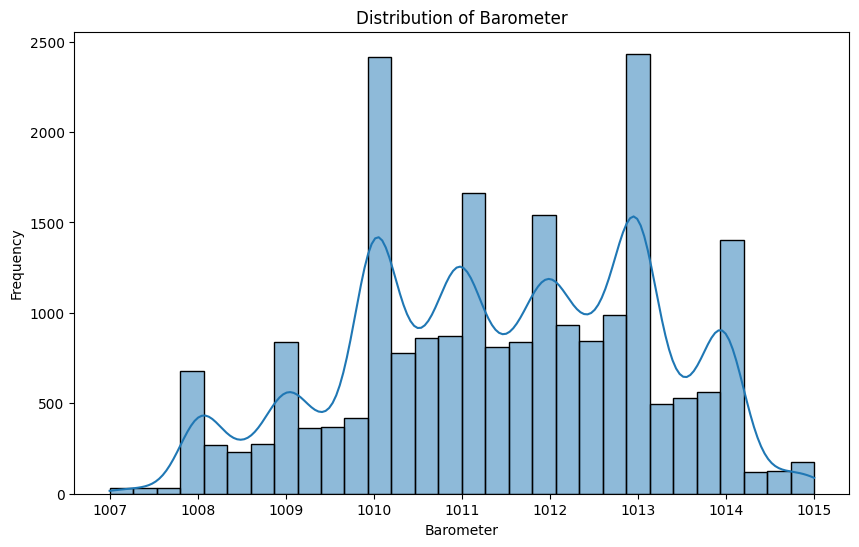

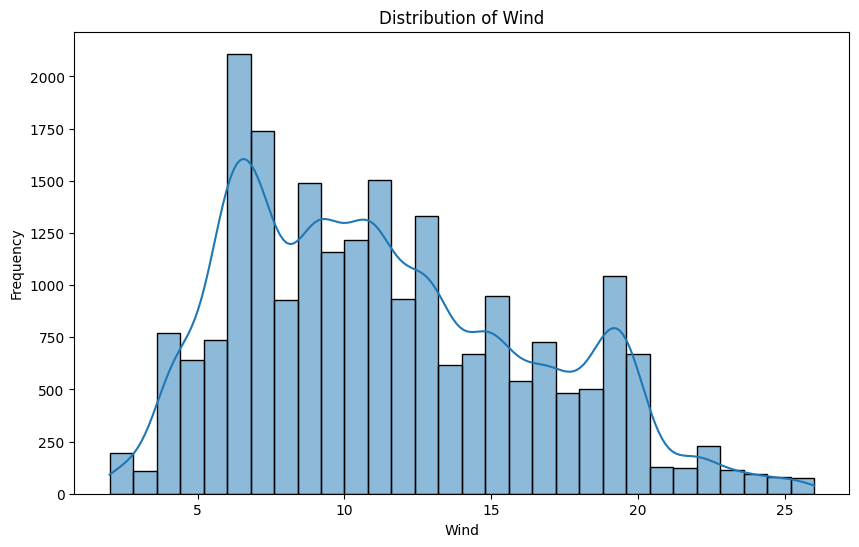

In [6]:
# Distribution plots for each variable
for col in columns_needed:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


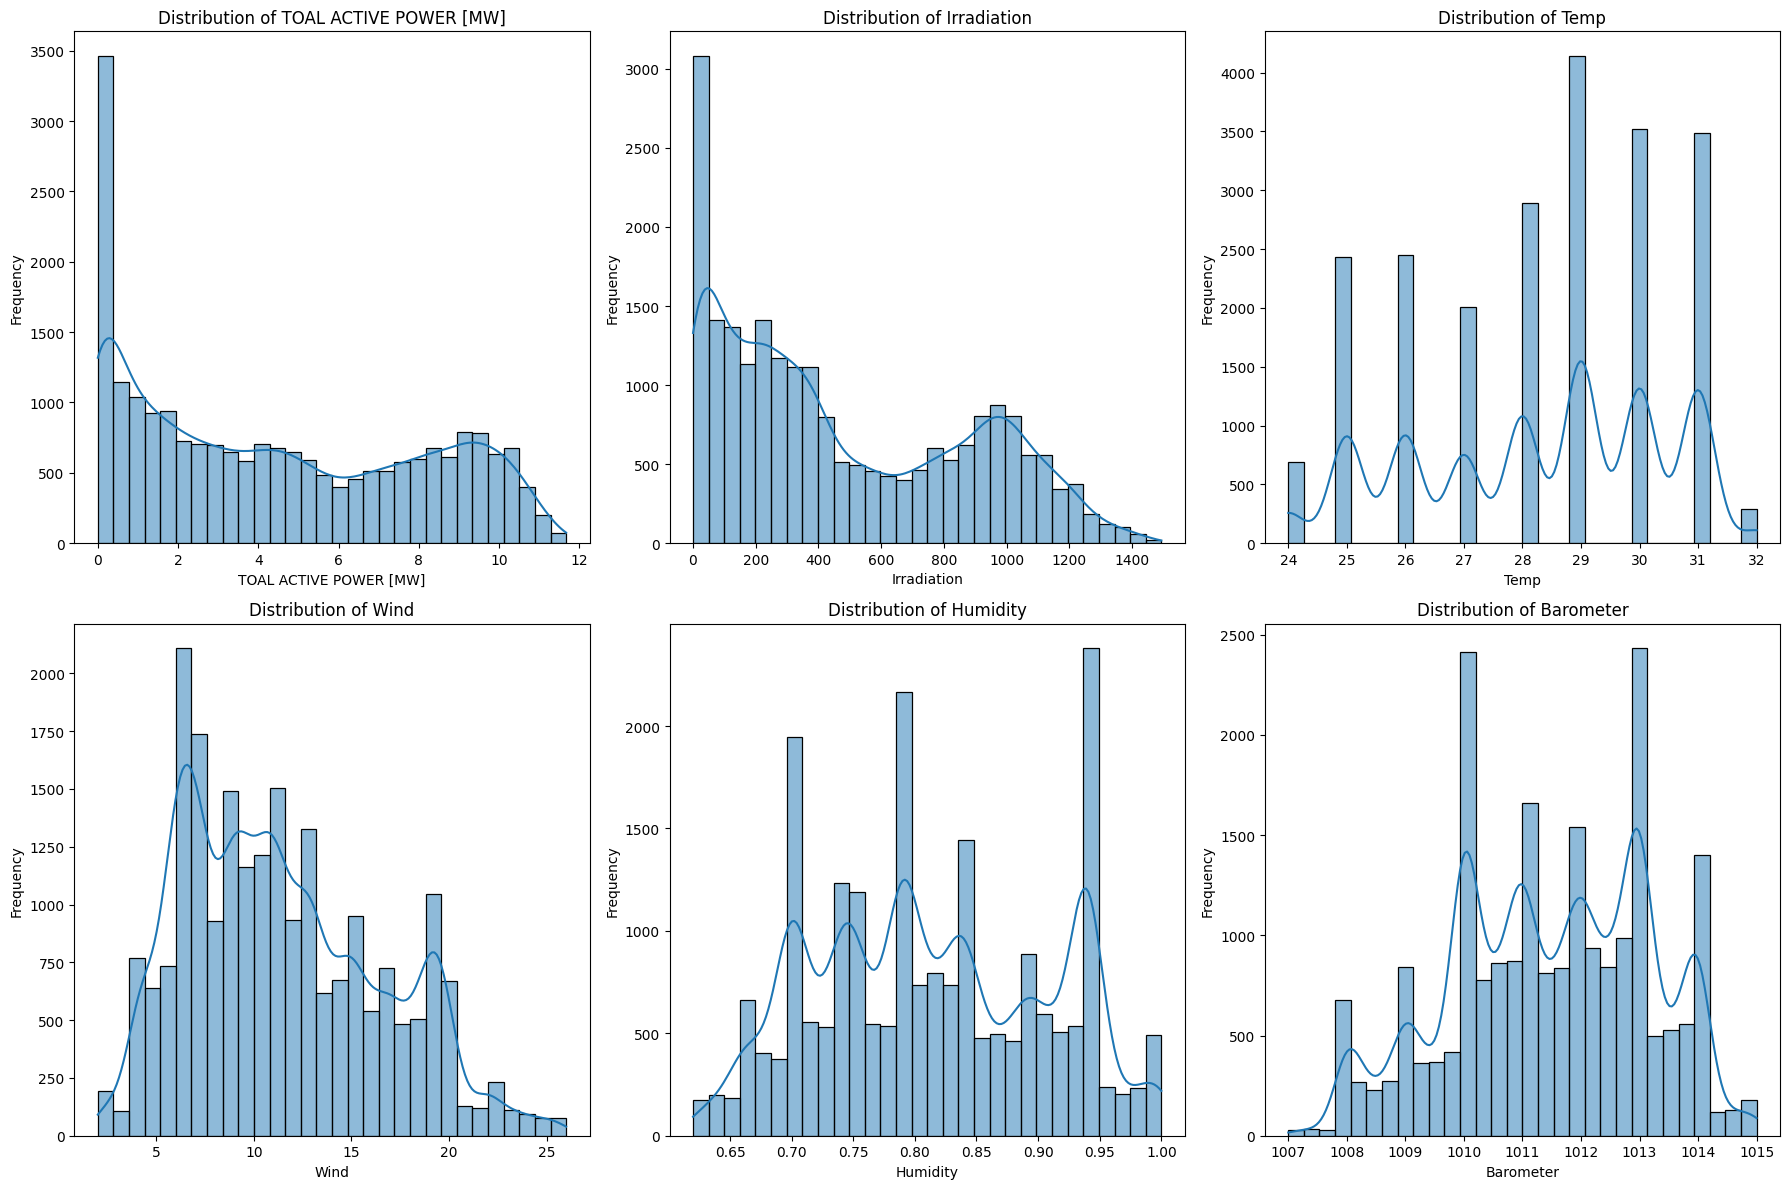

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
data.columns = data.columns.str.strip()  # This removes any leading or trailing spaces

# Define the correct column names
columns_needed = ['TOAL ACTIVE POWER [MW]', 'Irradiation', 'Temp', 'Wind', 'Humidity', 'Barometer']

# Create a figure with subplots
plt.figure(figsize=(18, 12))

# Iterate over each column and create a subplot
for i, col in enumerate(columns_needed, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, i is the current plot number
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col.strip()}')
    plt.xlabel(col.strip())
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()







In [11]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Calculate the summary statistics
summary_stats = data.describe()

# Save the summary statistics to a CSV file
summary_stats.to_csv('summary_statistics.csv', index=True)

# If you want to display the data in a tabular format directly in a notebook:
from IPython.display import display
display(summary_stats)


,Time,TOAL ACTIVE POWER [MW],Irradiation,Temp,Wind,Humidity,Barometer,Weather_Broken clouds,Weather_Clear,Weather_Light rain. Partly sunny,...,Weather_Sprinkles. Scattered clouds,Weather_Sunny,Weather_Thundershowers. Passing clouds,Weather_Thundershowers. Scattered clouds,Weather_Thunderstorms. Broken clouds,Weather_Thunderstorms. Mostly cloudy,Weather_Thunderstorms. Partly cloudy,Weather_Thunderstorms. Partly sunny,Weather_Thunderstorms. Passing clouds,Weather_Thunderstorms. Scattered clouds
count,21909,21909.000000,21909.000000,21909.000000,21909.000000,21909.000000,21909.000000,21909.000000,21909.000000,21909.000000,...,21909.000000,21909.000000,21909.000000,21909.000000,21909.000000,21909.0,21909.000000,21909.000000,21909.000000,21909.000000
mean,2023-10-16 10:00:59.791866368,4.454246,478.465031,28.266009,11.391234,0.812556,1011.462785,0.032863,0.005477,0.005477,...,0.005477,0.002739,0.005021,0.002739,0.002739,0.0,0.000046,0.005432,0.005477,0.017436
min,2023-10-01 06:00:00,0.000000,0.289352,24.000000,2.000000,0.620000,1007.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,2023-10-08 14:57:00,1.094311,135.243057,26.000000,7.000000,0.740000,1010.044444,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,2023-10-16 10:09:00,3.941589,360.416656,29.000000,10.700000,0.801667,1011.550000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,2023-10-24 07:59:00,7.726017,844.560181,30.000000,15.000000,0.892500,1012.950000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,2023-10-31 17:40:00,11.670927,1492.881958,32.000000,26.000000,1.000000,1015.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000
std,NaN,3.543124,392.189149,2.108692,5.031483,0.093972,1.691344,0.178283,0.073807,0.073807,...,0.073807,0.052261,0.070681,0.052261,0.052261,0.0,0.006756,0.073500,0.073807,0.130891


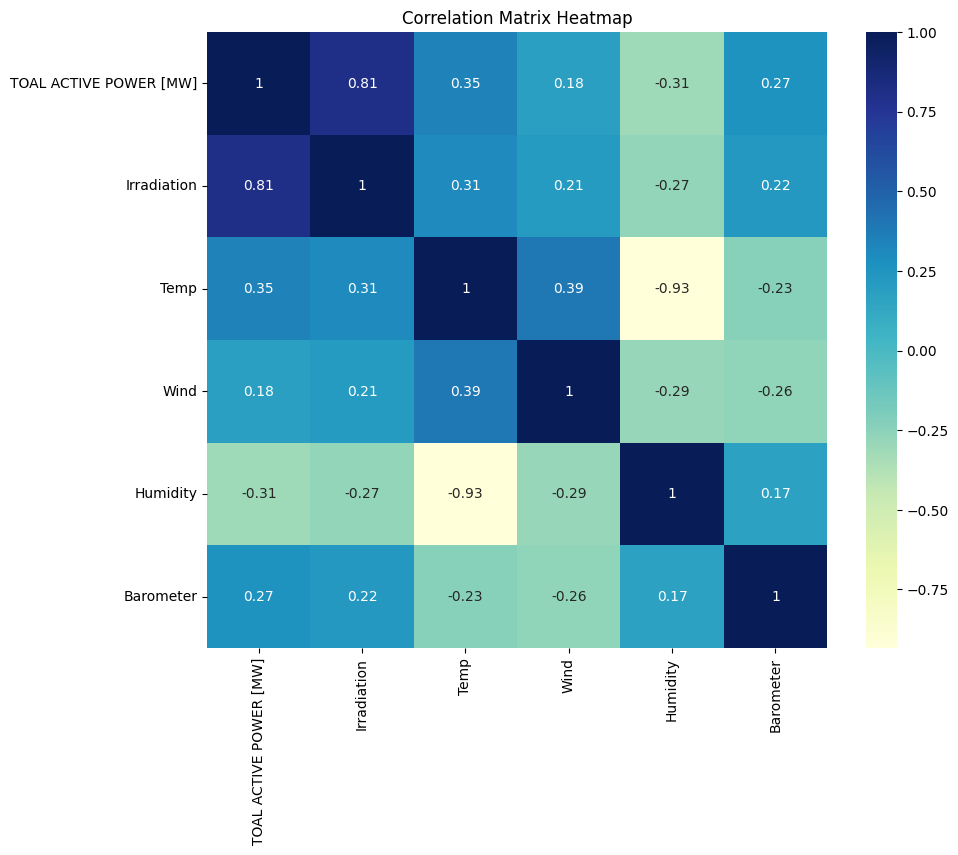

In [12]:
# Calculate the correlation matrix
correlation_matrix = data[columns_needed].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix Heatmap')
plt.show()


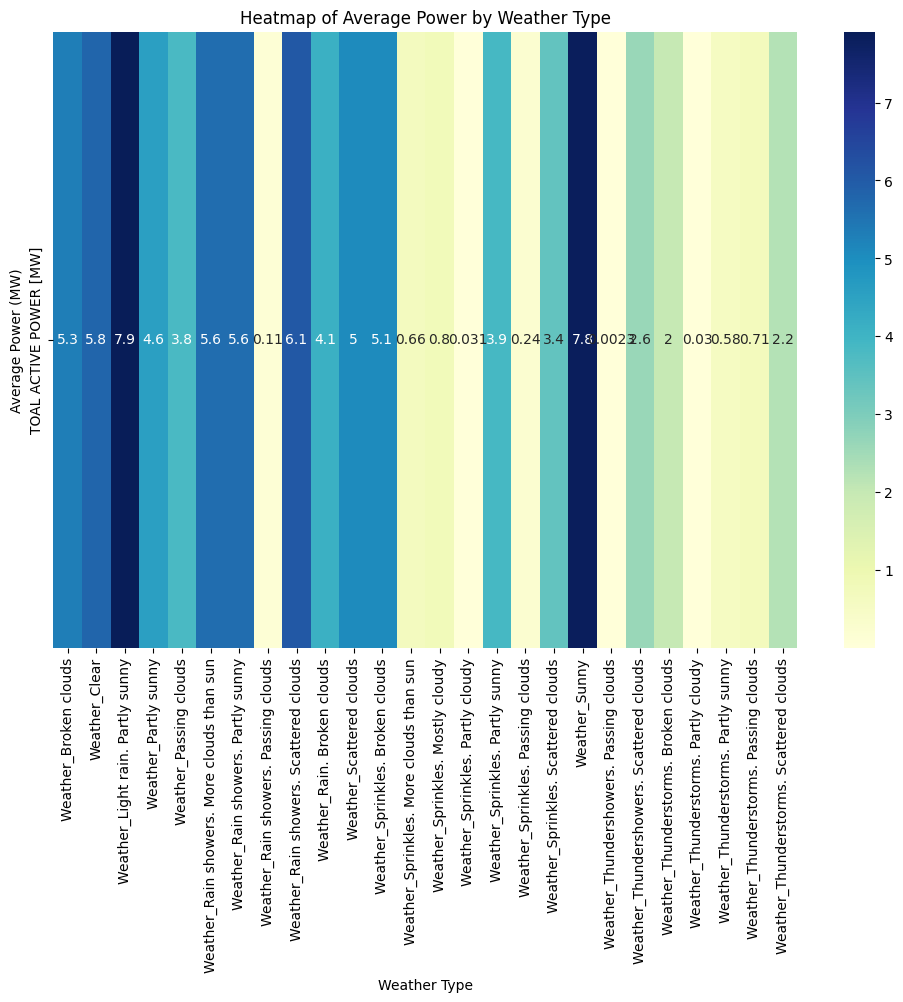

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
data.columns = data.columns.str.strip()  # This removes any leading or trailing spaces

# Define the correct column names
columns_needed = ['TOAL ACTIVE POWER [MW]', 'Irradiation', 'Temp', 'Wind', 'Humidity', 'Barometer']
weather_columns = [col for col in data.columns if col.startswith('Weather_')]

# Melt the DataFrame to long format for weather types
melted_data = pd.melt(data, id_vars=['TOAL ACTIVE POWER [MW]'], value_vars=weather_columns,
                      var_name='WeatherType', value_name='Present')

# Filter out rows where weather type is not present
melted_data = melted_data[melted_data['Present'] == 1]

# Group by WeatherType and calculate the mean of TOAL ACTIVE POWER [MW]
average_power_by_weather = melted_data.groupby('WeatherType')['TOAL ACTIVE POWER [MW]'].mean().reset_index()

# Create a heatmap based on average power by weather type
plt.figure(figsize=(12, 8))
sns.heatmap(average_power_by_weather.set_index('WeatherType').T, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Average Power by Weather Type')
plt.ylabel('Average Power (MW)')
plt.xlabel('Weather Type')
plt.show()


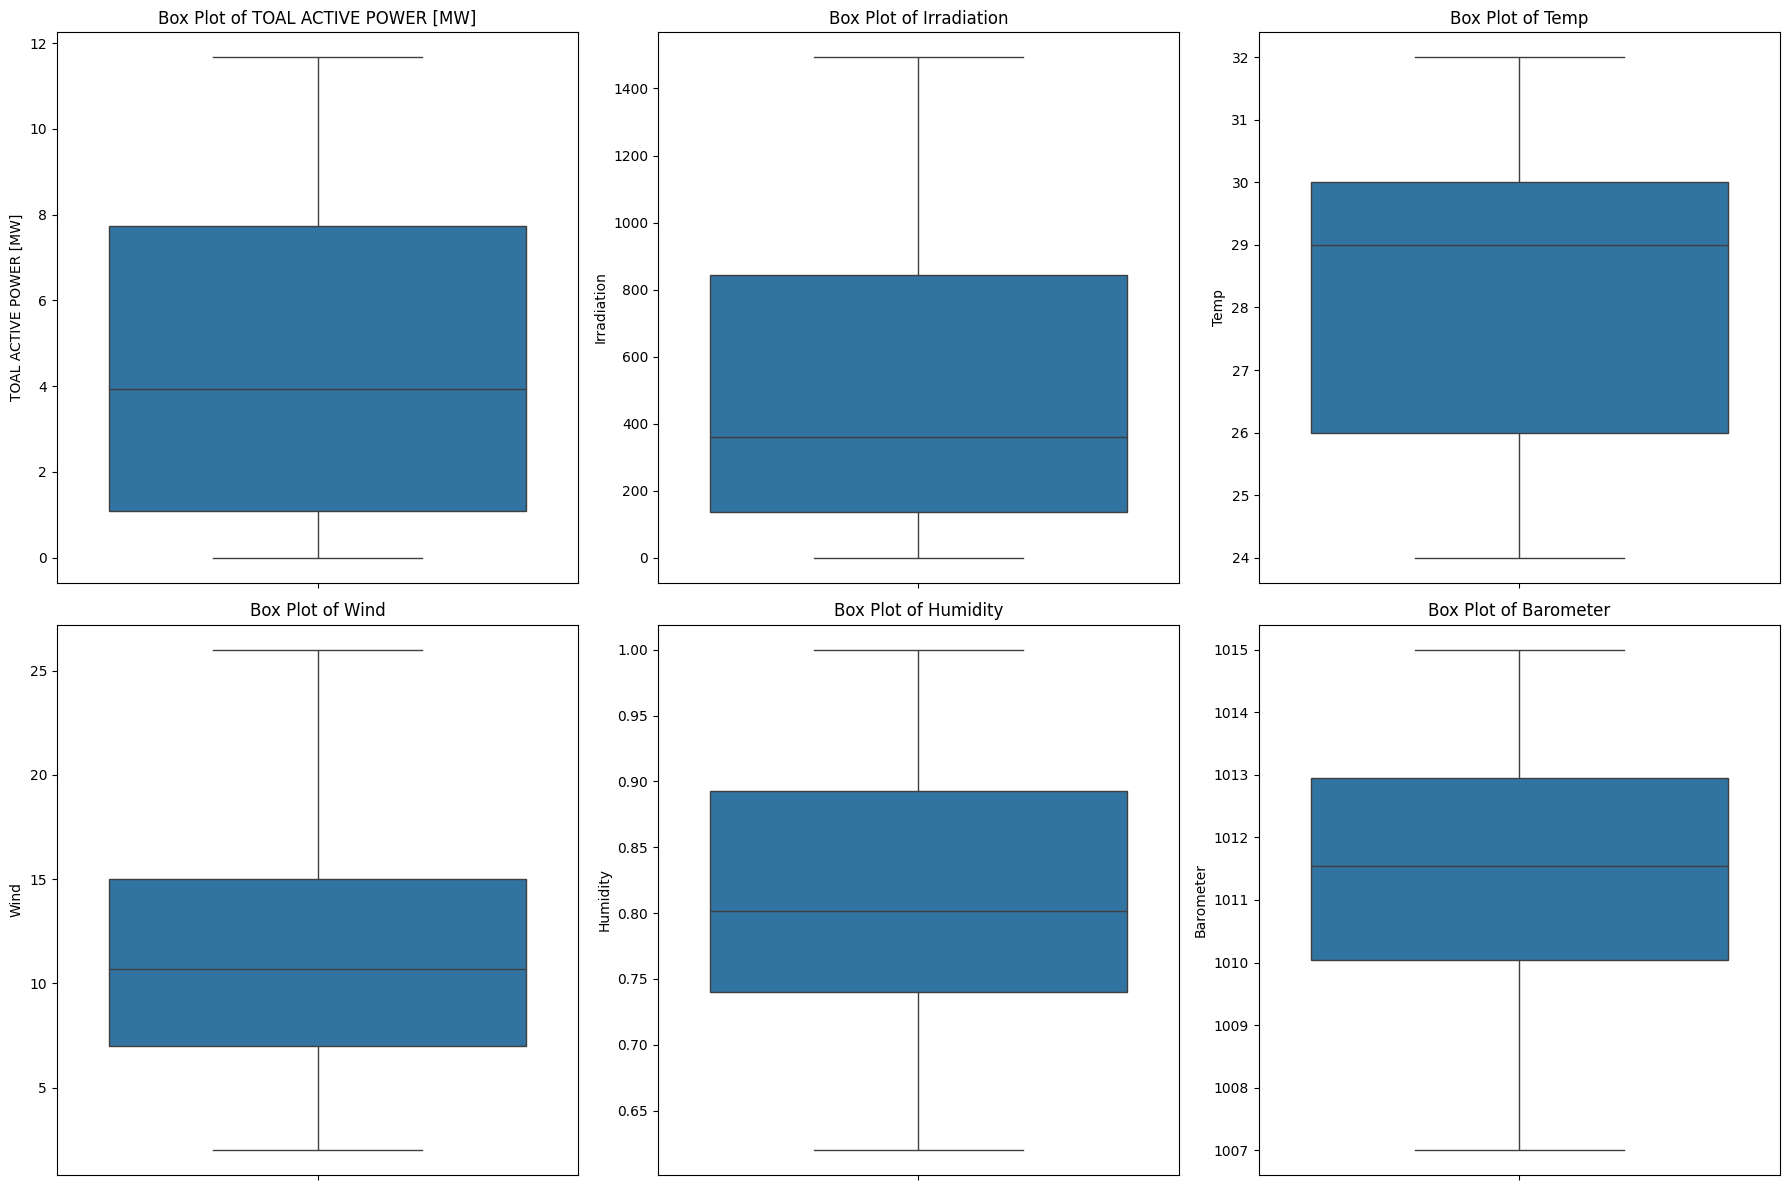

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel('/content/octomber by min.xlsx')

# Strip any leading or trailing spaces in the column names
data.columns = data.columns.str.strip()

# Define the correct column names after stripping spaces
columns_needed = ['TOAL ACTIVE POWER [MW]', 'Irradiation', 'Temp', 'Wind', 'Humidity', 'Barometer']

# Create a figure with subplots
plt.figure(figsize=(18, 12))

# Iterate over each column and create a subplot
for i, col in enumerate(columns_needed, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns, i is the current plot number
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined plot
plt.show()


In [18]:
import pandas as pd

# Load the dataset
data = pd.read_excel('/content/octomber by min.xlsx')

# Strip any leading or trailing spaces in the column names
data.columns = data.columns.str.strip()

# Define the columns for which you want to create lagged features
columns_to_lag = ['TOAL ACTIVE POWER [MW]', 'Irradiation', 'Temp', 'Wind', 'Humidity', 'Barometer']

# Number of lags to create (e.g., lag 1 and lag 2)
n_lags = 2

# Create lagged features
for col in columns_to_lag:
    for lag in range(1, n_lags + 1):
        data[f'{col}_lag_{lag}'] = data[col].shift(lag)

# Drop rows with NaN values created by the lagging
data.dropna(inplace=True)

# Display the first few rows of the dataset with lagged features
print(data.head())

# Save the lagged data to an Excel file
output_file_path = 'Lagged_data.xlsx'
data.to_excel(output_file_path, index=False)

print(f"Lagged data saved to {output_file_path}")


                 Time  TOAL ACTIVE POWER [MW]  Irradiation  Temp  Wind  \
2 2023-10-01 06:02:00                0.032324     3.472222    24   4.0   
3 2023-10-01 06:03:00                0.032324     3.472222    24   4.0   
4 2023-10-01 06:04:00                0.032324     3.472222    24   4.0   
5 2023-10-01 06:05:00                0.032324     3.472222    24   4.0   
6 2023-10-01 06:06:00                0.032324     3.472222    24   4.0   

   Humidity    Barometer  Weather_Broken clouds  Weather_Clear  \
2      0.94  1010.683333                      0              0   
3      0.94  1010.691667                      0              0   
4      0.94  1010.700000                      0              0   
5      0.94  1010.708333                      0              0   
6      0.94  1010.716667                      0              0   

   Weather_Light rain. Partly sunny  ...  Irradiation_lag_1  \
2                                 0  ...           3.472222   
3                               

In [19]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Define features and target variable
X = data[['Irradiation', 'Irradiation_lag_1', 'Irradiation_lag_2',
          'Temp', 'Temp_lag_1', 'Temp_lag_2',
          'Wind', 'Wind_lag_1', 'Wind_lag_2',
          'Humidity', 'Humidity_lag_1', 'Humidity_lag_2',
          'Barometer', 'Barometer_lag_1', 'Barometer_lag_2']]
y = data['TOAL ACTIVE POWER [MW]']

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients of the features
coefficients = pd.Series(model.coef_, index=X.columns)
print(coefficients.sort_values(ascending=False))


Humidity_lag_1       1.579274
Barometer_lag_2      1.420358
Humidity             0.639662
Humidity_lag_2       0.430433
Temp_lag_2           0.147332
Temp                 0.126135
Temp_lag_1           0.072009
Wind_lag_2           0.038271
Barometer_lag_1      0.030300
Irradiation          0.004653
Irradiation_lag_2    0.001707
Irradiation_lag_1    0.000480
Wind_lag_1          -0.000970
Wind                -0.044635
Barometer           -1.172258
dtype: float64


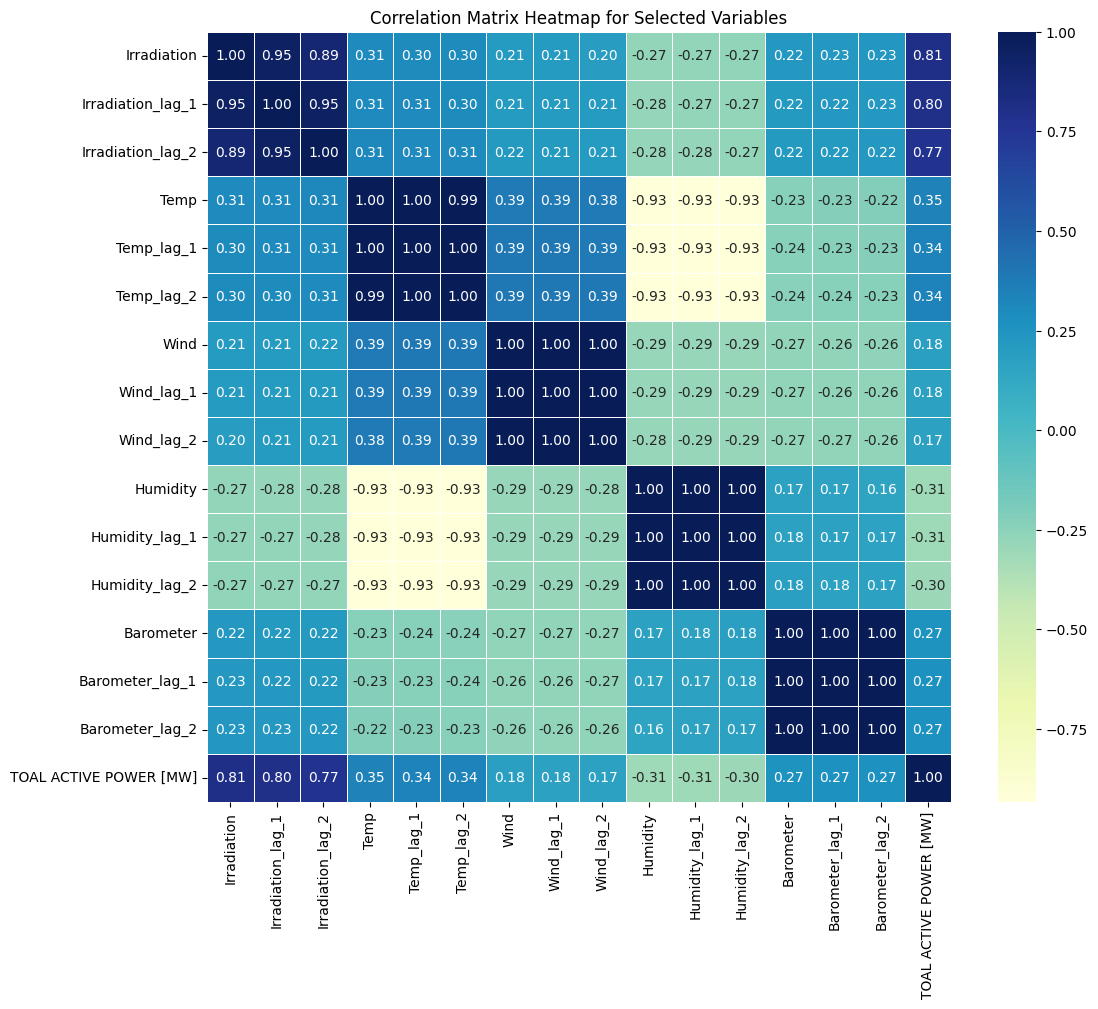

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is already loaded and processed
# If needed, load your data here
data = pd.read_excel('/content/Lagged_data.xlsx')

# Define the selected features and target variable
selected_columns = [
    'Irradiation', 'Irradiation_lag_1', 'Irradiation_lag_2',
    'Temp', 'Temp_lag_1', 'Temp_lag_2',
    'Wind', 'Wind_lag_1', 'Wind_lag_2',
    'Humidity', 'Humidity_lag_1', 'Humidity_lag_2',
    'Barometer', 'Barometer_lag_1', 'Barometer_lag_2',
    'TOAL ACTIVE POWER [MW]'  # Adding the target variable to the list
]

# Filter the DataFrame to include only the selected columns
data_filtered = data[selected_columns]

# Calculate the correlation matrix for the selected columns
correlation_matrix = data_filtered.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Selected Variables')
plt.show()


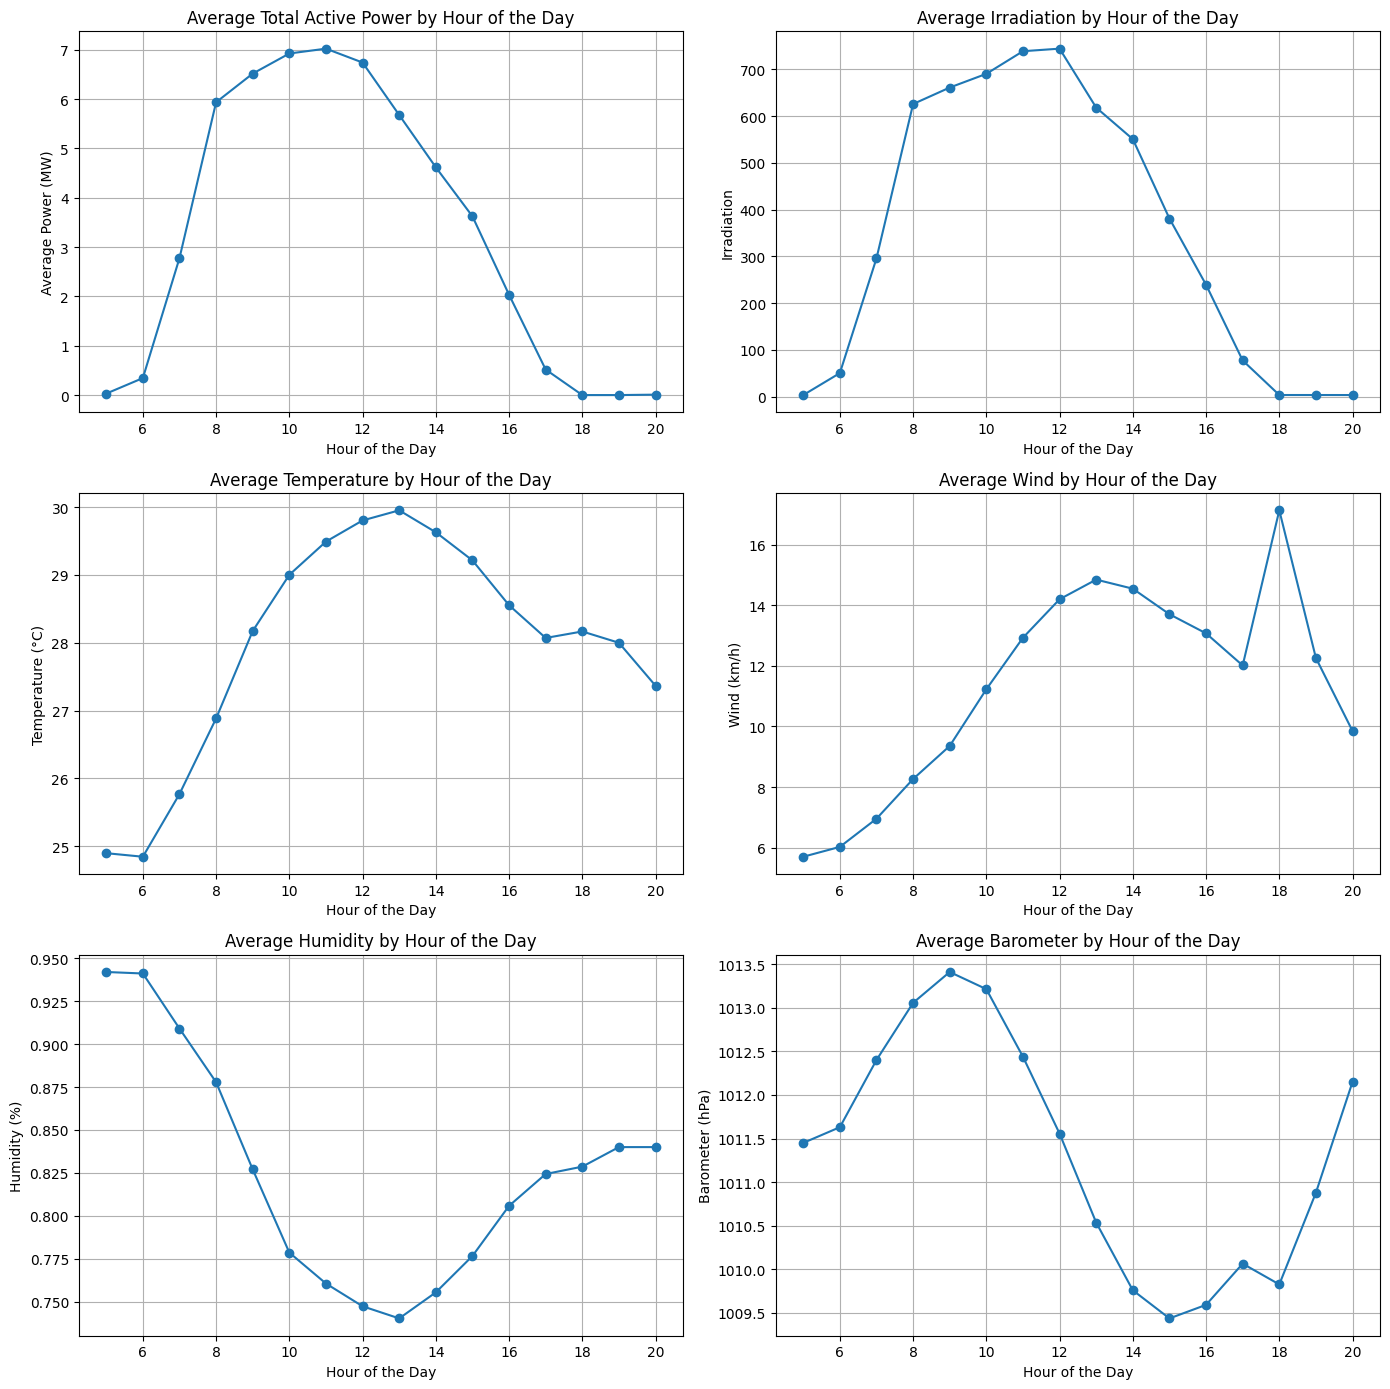

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Time' is the datetime column

# Convert 'Time' to datetime if it's not already
data['Time'] = pd.to_datetime(data['Time'])

# Extract hour from time
data['Hour'] = data['Time'].dt.hour

# Group by hour and calculate the mean
hourly_data = data.groupby('Hour').mean()

# Plotting all variables in a single figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# Plotting Total Active Power
axes[0, 0].plot(hourly_data.index, hourly_data['TOAL ACTIVE POWER [MW]'], marker='o')
axes[0, 0].set_title('Average Total Active Power by Hour of the Day')
axes[0, 0].set_xlabel('Hour of the Day')
axes[0, 0].set_ylabel('Average Power (MW)')
axes[0, 0].grid(True)

# Plotting Irradiation
axes[0, 1].plot(hourly_data.index, hourly_data['Irradiation'], marker='o')
axes[0, 1].set_title('Average Irradiation by Hour of the Day')
axes[0, 1].set_xlabel('Hour of the Day')
axes[0, 1].set_ylabel('Irradiation')
axes[0, 1].grid(True)

# Plotting Temperature
axes[1, 0].plot(hourly_data.index, hourly_data['Temp'], marker='o')
axes[1, 0].set_title('Average Temperature by Hour of the Day')
axes[1, 0].set_xlabel('Hour of the Day')
axes[1, 0].set_ylabel('Temperature (°C)')
axes[1, 0].grid(True)

# Plotting Wind
axes[1, 1].plot(hourly_data.index, hourly_data['Wind'], marker='o')
axes[1, 1].set_title('Average Wind by Hour of the Day')
axes[1, 1].set_xlabel('Hour of the Day')
axes[1, 1].set_ylabel('Wind (km/h)')
axes[1, 1].grid(True)

# Plotting Humidity
axes[2, 0].plot(hourly_data.index, hourly_data['Humidity'], marker='o')
axes[2, 0].set_title('Average Humidity by Hour of the Day')
axes[2, 0].set_xlabel('Hour of the Day')
axes[2, 0].set_ylabel('Humidity (%)')
axes[2, 0].grid(True)

# Plotting Barometer
axes[2, 1].plot(hourly_data.index, hourly_data['Barometer'], marker='o')
axes[2, 1].set_title('Average Barometer by Hour of the Day')
axes[2, 1].set_xlabel('Hour of the Day')
axes[2, 1].set_ylabel('Barometer (hPa)')
axes[2, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


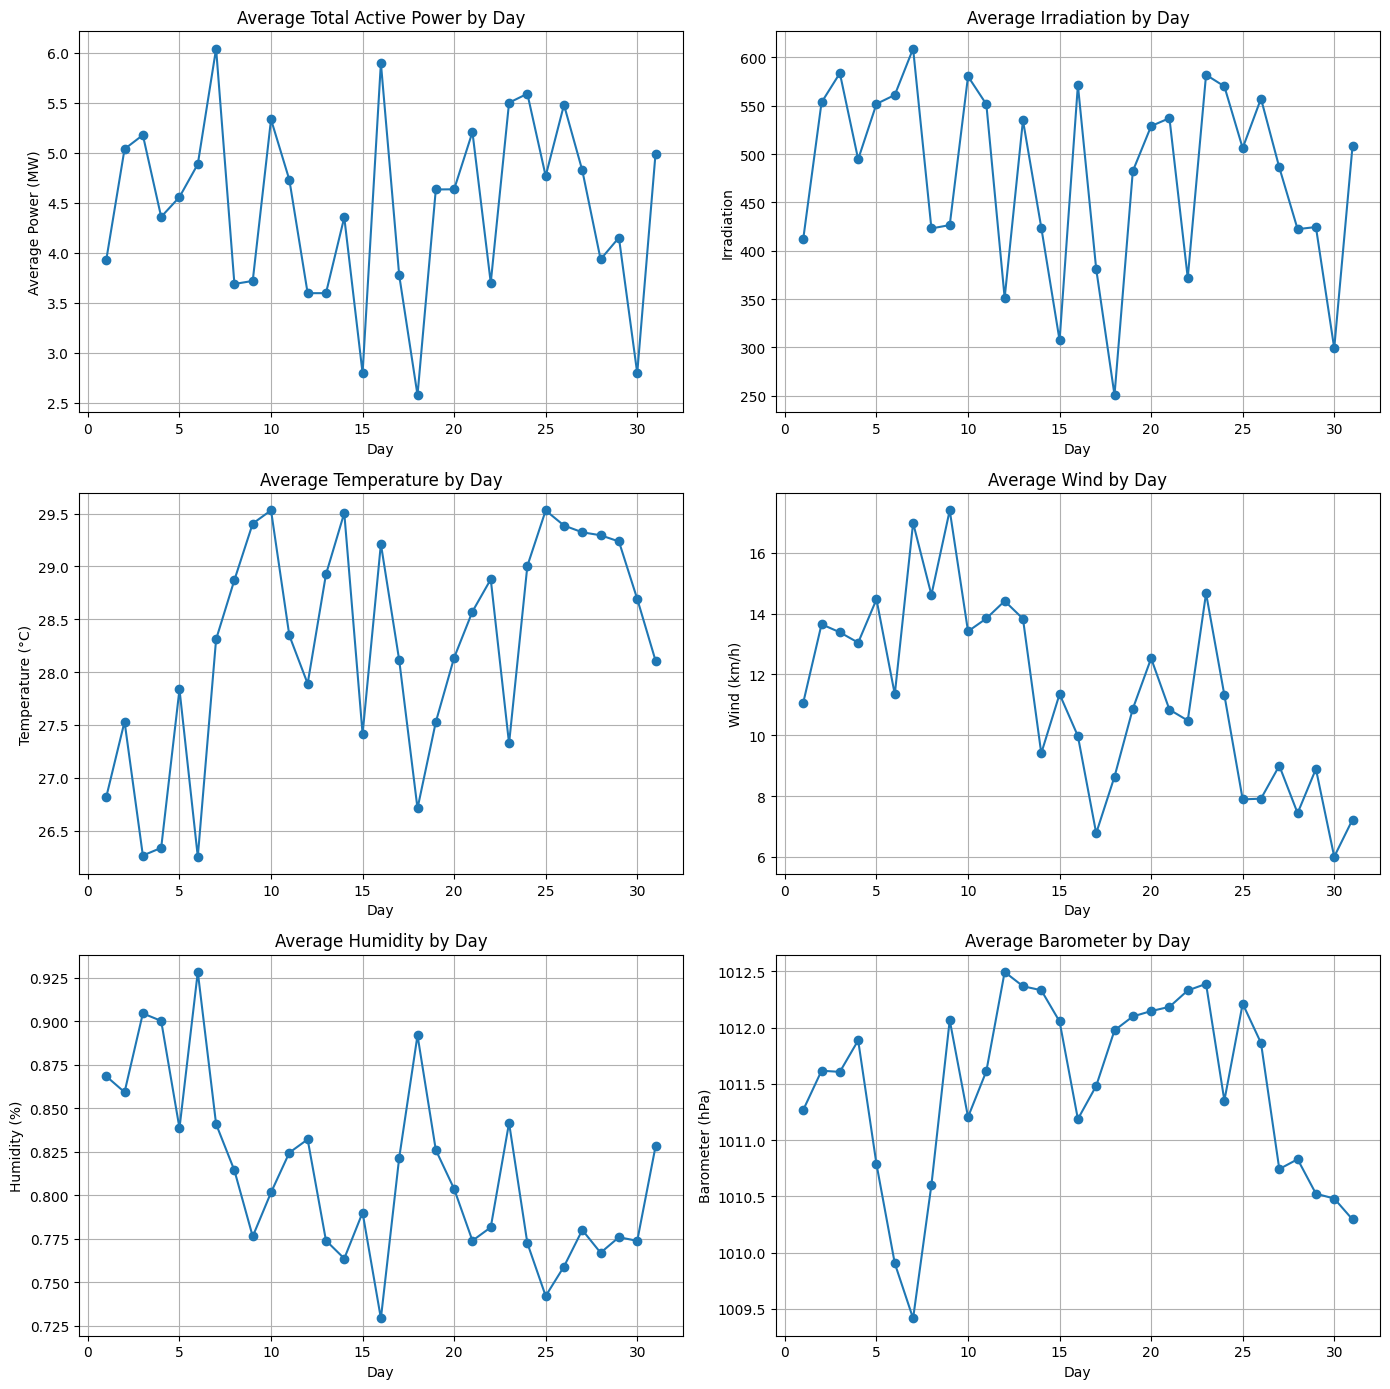

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'Time' is the datetime column

# Convert 'Time' to datetime if it's not already
data['Time'] = pd.to_datetime(data['Time'])

# Extract day from time
data['Day'] = data['Time'].dt.day

# Group by day and calculate the mean
daily_data = data.groupby('Day').mean()

# Plotting all variables in a single figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 14))

# Plotting Total Active Power
axes[0, 0].plot(daily_data.index, daily_data['TOAL ACTIVE POWER [MW]'], marker='o')
axes[0, 0].set_title('Average Total Active Power by Day')
axes[0, 0].set_xlabel('Day')
axes[0, 0].set_ylabel('Average Power (MW)')
axes[0, 0].grid(True)

# Plotting Irradiation
axes[0, 1].plot(daily_data.index, daily_data['Irradiation'], marker='o')
axes[0, 1].set_title('Average Irradiation by Day')
axes[0, 1].set_xlabel('Day')
axes[0, 1].set_ylabel('Irradiation')
axes[0, 1].grid(True)

# Plotting Temperature
axes[1, 0].plot(daily_data.index, daily_data['Temp'], marker='o')
axes[1, 0].set_title('Average Temperature by Day')
axes[1, 0].set_xlabel('Day')
axes[1, 0].set_ylabel('Temperature (°C)')
axes[1, 0].grid(True)

# Plotting Wind
axes[1, 1].plot(daily_data.index, daily_data['Wind'], marker='o')
axes[1, 1].set_title('Average Wind by Day')
axes[1, 1].set_xlabel('Day')
axes[1, 1].set_ylabel('Wind (km/h)')
axes[1, 1].grid(True)

# Plotting Humidity
axes[2, 0].plot(daily_data.index, daily_data['Humidity'], marker='o')
axes[2, 0].set_title('Average Humidity by Day')
axes[2, 0].set_xlabel('Day')
axes[2, 0].set_ylabel('Humidity (%)')
axes[2, 0].grid(True)

# Plotting Barometer
axes[2, 1].plot(daily_data.index, daily_data['Barometer'], marker='o')
axes[2, 1].set_title('Average Barometer by Day')
axes[2, 1].set_xlabel('Day')
axes[2, 1].set_ylabel('Barometer (hPa)')
axes[2, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()
